# 实验课 10

## 实验10-1 Pandas库初步（下）

### 步骤1 数据表信息查看

创建一个DataFrame对象后，我们可以从宏观角度查看这个DataFrame对象的相关基本信息，例如对象的形状、数据格式、某一列是否含有空值等等。

例如我们加载鸢尾花数据集（非原始数据集，经过一些人工修改），创建一个DataFrame对象。

In [1]:
import pandas as pd
import numpy as np

f = open('data/iris_with_error.csv','r',encoding='utf-8')
iris_data = pd.read_csv(f)
f.close()

* 我们可以直接输出DataFrame对象的所有内容，当然对于包含很多行的DataFrame对象，只会输出前后几行内容。

In [2]:
print(iris_data)

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width    Species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          NaN           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica
150           5.9          3.0           5.1          1.8  virginica
151           6.2          3.4           5.4          2.3  virginica

[152 rows x 5 columns]


* 当然我们可以使用`head(n)`或`tail(n)`方法显示DataFrame对象的前n行或者最后n行内容（若不提供实参，默认显示5行）。

In [3]:
print(iris_data.head())  # 输出前5行

   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          NaN           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [4]:
print(iris_data.tail(6))  # 输出最后6行

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width    Species
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica
150           5.9          3.0           5.1          1.8  virginica
151           6.2          3.4           5.4          2.3  virginica


* 我们可以通过DataFrame对象的`shape`属性查看其形状，例如这个数据集由152条数据组成，每条数据包含4个属性值以及鸢尾花的种类，所以`iris_data`对象的形状为(150,5)。

In [5]:
print(iris_data.shape)

(152, 5)


* 通过`info()`方法可以查看DataFrame对象的基本信息，包括形状、列索引、列数据类型、对象所占内存大小等。

In [6]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  151 non-null    float64
 1   Sepal_Width   149 non-null    float64
 2   Petal_Length  148 non-null    float64
 3   Petal_Width   148 non-null    float64
 4   Species       151 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.1+ KB


* 如果DataFrame对象包含了大量列，可能寻找某一列的数据类型会变得很困难，我们可以利用Series对象的`dtype`属性获取某一列（不要忘了一列数据是一个Series对象）的数据类型；利用`dtypes`获取多列的数据类型。

In [7]:
print(iris_data['Sepal_Length'].dtype)  # 查看'Sepal_Length`列的数据类型

float64


In [8]:
print(iris_data.iloc[:,0:2].dtypes)  # 查看前2列的数据类型

Sepal_Length    float64
Sepal_Width     float64
dtype: object


### 步骤2 数据清洗

由于客观因素，例如传感器故障、存储设施损坏、人工录入数据失误等等，我们获取到的数据并不一定是完美无缺的，在对获取到的数据进行进一步的分析之前，我们需要对原始的数据进行“清洗”。

顾名思义，数据清洗就是对原始数据中的“脏”数据进行相关处理。对于原始数据来说，经常出现的问题如下所示：

* 数据缺失
* 数据值不符合实际
* 数据重复
* 索引不明确
* ……

可以说进行数据分析，大部分时间都是在对原始数据做预处理工作。由此可见数据清洗对后续数据分析的影响非常之大。

#### 1. 数据缺失值处理

数据缺失可能由于实际情况下未获取到有效数据而留空、或人工录入时疏忽遗漏。

经人工修改的鸢尾花数据集的第2条数据中含有一个数据空缺项，在CSV文件中以空字符串表示：
```
4.9,,1.4,0.2,setosa
```
通过Pandas读入该CSV文件后，以`NaN`存储和表示（`NaN`全称*Not a Number*，是一种按照IEEE浮点数标准设计，在任何系统中都兼容的特殊浮点数，用以代替表示缺失值）。

In [9]:
print(iris_data.iloc[1])

Sepal_Length       4.9
Sepal_Width        NaN
Petal_Length       1.4
Petal_Width        0.2
Species         setosa
Name: 1, dtype: object


为演示方便，我们先创建一个3*3的二维数组并将其转换为DataFrame对象，其中设置一些空缺值。

In [10]:
data_2 = pd.DataFrame([[1,     np.NaN,2],
                       [2,     3     ,5],
                       [np.NaN,4,     6]],columns=['ColA','ColB','ColC'])
print(data_2)

   ColA  ColB  ColC
0   1.0   NaN     2
1   2.0   3.0     5
2   NaN   4.0     6


* 我们可以用`fillna()`方法，用某个值填充空值。

In [11]:
data_3 = data_2.fillna(0)  # 用0填充所有的空缺值
print(data_3)

   ColA  ColB  ColC
0   1.0   0.0     2
1   2.0   3.0     5
2   0.0   4.0     6


In [12]:
data_4 = data_2.copy()
data_4['ColB'] = data_4['ColB'].fillna(data_4['ColB'].mean())  # 用‘ColB’列的均值填充'ColB'列的空缺值
# 也可以用中位数填充data_2['ColB'] = data_2['ColB'].fillna(data_2['ColB'].median())
print(data_4)

   ColA  ColB  ColC
0   1.0   3.5     2
1   2.0   3.0     5
2   NaN   4.0     6


* 也可以添加`method='ffill'`或者`method='bfill'`参数用缺失值前面或后面的有效值向后（向前）填充（若缺失值前（后）面没有有效值，那么它仍然是缺失值）

In [15]:
data_5 = data_2.fillna(method='ffill')  # 从前向后填充
print(data_5)

   ColA  ColB  ColC
0   1.0   NaN     2
1   2.0   3.0     5
2   2.0   4.0     6


In [16]:
data_6 = data_2.fillna(method='bfill')  # 从后向前填充
print(data_6)

   ColA  ColB  ColC
0   1.0   3.0     2
1   2.0   3.0     5
2   NaN   4.0     6


* 如果数据集中包含大量数据，剔除一条数据对整体数据分析没有过大影响的情况下，可以通过`dropna()`方法剔除数据行；
  > 也可以添加`how='all'`参数设定只剔除全部数据项为空的数据行；
  >
  > 也可以添加`subset=['ColNameA','ColNameB',...]`参数设定只剔除指定列含有空缺值的数据行。
* 通过`dropna(thresh = n)`方法可以保留完整数据项大于等于n个的数据行，其余的数据行将被剔除。

我们再创建一个稍大的DataFrame对象用于演示以上方法。

In [17]:
arr = np.array([[1,2,3,4,5],
                [6,np.NaN,8,9,10],
                [11,12,np.NaN,np.NaN,15],
                [16,np.NaN,np.NaN,19,20],
                [np.NaN,np.NaN,np.NaN,np.NaN,np.NaN]])
data_7 = pd.DataFrame(arr,columns=['ColA','ColB','ColC','ColD','ColE'])
print(data_7)

   ColA  ColB  ColC  ColD  ColE
0   1.0   2.0   3.0   4.0   5.0
1   6.0   NaN   8.0   9.0  10.0
2  11.0  12.0   NaN   NaN  15.0
3  16.0   NaN   NaN  19.0  20.0
4   NaN   NaN   NaN   NaN   NaN


In [18]:
data_8 = data_7.dropna()  # 只要数据行中含有空缺值，即剔除
print(data_8)

   ColA  ColB  ColC  ColD  ColE
0   1.0   2.0   3.0   4.0   5.0


In [19]:
data_9 = data_7.dropna(how='all')  # 剔除全空的数据行
print(data_9)

   ColA  ColB  ColC  ColD  ColE
0   1.0   2.0   3.0   4.0   5.0
1   6.0   NaN   8.0   9.0  10.0
2  11.0  12.0   NaN   NaN  15.0
3  16.0   NaN   NaN  19.0  20.0


In [20]:
data_10 = data_7.dropna(subset=['ColC','ColD'])  # 剔除C列或D列中含有空缺值的数据行
print(data_10)

   ColA  ColB  ColC  ColD  ColE
0   1.0   2.0   3.0   4.0   5.0
1   6.0   NaN   8.0   9.0  10.0


In [21]:
data_11 = data_7.dropna(thresh=4)  # 仅保留完整数据项超过4个的数据行，其余数据行将被剔除
print(data_11)

   ColA  ColB  ColC  ColD  ColE
0   1.0   2.0   3.0   4.0   5.0
1   6.0   NaN   8.0   9.0  10.0


#### 2. 更改数据类型

有的时候某个数据列的数据类型并不是我们想要的类型，例如年龄，实际情况下该列的数据类型应该是整型，但种种因素可能导致年龄列的数据类型为浮点型，为了方便后续数据分析，我们应该对数据列的数据类型根据实际情景进行更改。

例如我们把`data_9`的`ColA`列的数据类型更改为整型。

In [22]:
data_12 = data_9.copy()
data_12['ColA'] = data_12['ColA'].astype('int')
data_12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ColA    4 non-null      int32  
 1   ColB    2 non-null      float64
 2   ColC    2 non-null      float64
 3   ColD    3 non-null      float64
 4   ColE    4 non-null      float64
dtypes: float64(4), int32(1)
memory usage: 176.0 bytes


#### 3. 更改列索引名称

原始数据中的列名可能使用缩写、中英文混合等方式，这对于我们处理来说并没有太大影响。不过为了了解以及选取数据列更加方便，我们可以通过`rename()`方法修改列索引。

例如我们把`data_7`的前两列索引名称修改为`A`和`B`。

In [23]:
data_13 = data_7.copy()
data_13 = data_13.rename(columns={'ColA':'A','ColB':'B'})
print(data_13)

      A     B  ColC  ColD  ColE
0   1.0   2.0   3.0   4.0   5.0
1   6.0   NaN   8.0   9.0  10.0
2  11.0  12.0   NaN   NaN  15.0
3  16.0   NaN   NaN  19.0  20.0
4   NaN   NaN   NaN   NaN   NaN


#### 4. 剔除重复数据

有一种情况是由于传感器误重复返回数据或者人工录入疏忽，造成数据文件中含有相同的数据行，这会对后期对数据进行数学分析时产生影响，所以我们需要剔除重复的数据行。

例如我们有如下数据，Id值为1和2的两个数据行除了Id字段其他字段值均相同，我们可以认为这是两条重复的数据。

我们使用`drop_duplicates()`方法剔除重复的数据行。

In [24]:
person_list = [{'Id':1,'Name':'Tom','Age':18,'Weight':57.2},
               {'Id':2,'Name':'Tom','Age':18,'Weight':57.2},
               {'Id':3,'Name':'Jerry','Age':17,'Weight':42.7},
               {'Id':4,'Name':'Eric','Age':19,'Weight':63.4}]
data_14 = pd.DataFrame(person_list)
print(data_14)

   Id   Name  Age  Weight
0   1    Tom   18    57.2
1   2    Tom   18    57.2
2   3  Jerry   17    42.7
3   4   Eric   19    63.4


In [25]:
data_15 = data_14.drop_duplicates(subset=['Name','Age'])  # 只要某两行数据的Name和Age字段相同，就认为它们是重复的数据行
print(data_15)

   Id   Name  Age  Weight
0   1    Tom   18    57.2
2   3  Jerry   17    42.7
3   4   Eric   19    63.4


我们看到行索引也同时被剔除，产生了行索引断层，我们可以用`reset_index()`方法重置行索引。

In [26]:
data_15 = data_15.reset_index()
print(data_15)

   index  Id   Name  Age  Weight
0      0   1    Tom   18    57.2
1      2   3  Jerry   17    42.7
2      3   4   Eric   19    63.4


### 步骤3 数据排序

在Excel中，通过数据排序我们可以快速浏览数据的大致分布情况。Pandas也提供了`sort_values`方法依照某个字段对数据表进行排序。

例如我们以花瓣长度（Petal Length）为关键字对鸢尾花数据进行排序。

In [27]:
data_16 = iris_data.sort_values(by=['Petal_Length'])
print(data_16)

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width     Species
22            4.6          3.6           1.0          0.2      setosa
13            4.3          3.0           1.1          0.1      setosa
14            5.8          4.0           1.2          0.2      setosa
35            5.0          3.2           1.2          0.2      setosa
2             4.7          3.2           1.3          0.2      setosa
..            ...          ...           ...          ...         ...
118           7.7          2.6           6.9          2.3   virginica
6             4.6          3.4           NaN          0.3      setosa
15            NaN          NaN           NaN          0.4      setosa
62            6.0          2.2           NaN          1.0  versicolor
137           6.4          3.1           NaN          1.8   virginica

[152 rows x 5 columns]


可以看到默认排序按照升序排序，并且空缺值放置在最后，如果需要降序排序，需要设置`ascending`参数为`False`。

In [28]:
data_17 = iris_data.sort_values(by=['Petal_Length'],ascending=False)
print(data_17)

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width     Species
118           7.7          2.6           6.9          2.3   virginica
117           7.7          3.8           6.7          2.2   virginica
122           7.7          2.8           6.7          2.0   virginica
105           7.6          3.0           6.6          2.1   virginica
131           7.9          3.8           6.4          2.0   virginica
..            ...          ...           ...          ...         ...
22            4.6          3.6           1.0          0.2      setosa
6             4.6          3.4           NaN          0.3      setosa
15            NaN          NaN           NaN          0.4      setosa
62            6.0          2.2           NaN          1.0  versicolor
137           6.4          3.1           NaN          1.8   virginica

[152 rows x 5 columns]


我们还可以根据多个关键字进行排序。

In [29]:
data_18 = iris_data.sort_values(by=['Sepal_Length','Petal_Length'])
print(data_18)

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width    Species
13            4.3          3.0           1.1          0.1     setosa
38            4.4          3.0           1.3          0.2     setosa
42            4.4          3.2           1.3          0.2     setosa
8             4.4          2.9           1.4          0.2     setosa
41            4.5          2.3           1.3          0.3     setosa
..            ...          ...           ...          ...        ...
117           7.7          3.8           6.7          2.2  virginica
122           7.7          2.8           6.7          2.0  virginica
118           7.7          2.6           6.9          2.3  virginica
131           7.9          3.8           6.4          2.0  virginica
15            NaN          NaN           NaN          0.4     setosa

[152 rows x 5 columns]


### 步骤4 数据筛选

之前我们利用切片以及索引器对DataFrame对象进行行列的筛选，我们还可以在索引器中写入判断表达式，更可以配合与`&`、或`|`、非`~`，对数据进行筛选。

例如我们对鸢尾花数据集进行筛选，首先筛选出花萼长度小于4.5的数据行：

In [30]:
data_19 = iris_data.loc[iris_data['Sepal_Length'] < 4.5]
print(data_19)

    Sepal_Length  Sepal_Width  Petal_Length  Petal_Width Species
8            4.4          2.9           1.4          0.2  setosa
13           4.3          3.0           1.1          0.1  setosa
38           4.4          3.0           1.3          0.2  setosa
42           4.4          3.2           1.3          0.2  setosa


利用逻辑“与”筛选出花萼长度小于4.5且花萼宽度等于3.0的数据行：

In [31]:
data_20 = iris_data.loc[(iris_data['Sepal_Length'] < 4.5) & (iris_data['Sepal_Width'] == 3.0)]
print(data_20)

    Sepal_Length  Sepal_Width  Petal_Length  Petal_Width Species
13           4.3          3.0           1.1          0.1  setosa
38           4.4          3.0           1.3          0.2  setosa


利用逻辑“非”筛选出除了setosa品种的数据行：

In [32]:
data_21 = iris_data.loc[iris_data['Species'] != 'setosa']
print(data_21)

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width     Species
50            7.0          3.2           4.7          1.4  versicolor
51            6.4          3.2           4.5          1.5  versicolor
52            6.9          3.1           4.9          1.5  versicolor
53            5.5          2.3           4.0          1.3  versicolor
54            6.5          2.8           4.6          1.5  versicolor
..            ...          ...           ...          ...         ...
147           6.5          3.0           5.2          2.0   virginica
148           6.2          3.4           5.4          2.3   virginica
149           5.9          3.0           5.1          1.8   virginica
150           5.9          3.0           5.1          1.8   virginica
151           6.2          3.4           5.4          2.3   virginica

[102 rows x 5 columns]


我们也可以使用`query()`方法利用查询字符串进行快速筛选（注意，逻辑与使用`and`；逻辑或使用`or`；逻辑非使用`not`）。

例如筛选出花瓣长度大于6.0或花瓣宽度等于0.1的数据行：

In [33]:
data_22 = iris_data.query('Petal_Length > 6.5 or Petal_Width == 0.1')
print(data_22)

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width    Species
9             4.9          3.1           1.5          0.1     setosa
12            4.8          3.0           1.4          0.1     setosa
13            4.3          3.0           1.1          0.1     setosa
32            5.2          4.1           1.5          0.1     setosa
34            4.9          3.1           1.5          0.1     setosa
37            4.9          3.1           1.5          0.1     setosa
105           7.6          3.0           6.6          2.1  virginica
117           7.7          3.8           6.7          2.2  virginica
118           7.7          2.6           6.9          2.3  virginica
122           7.7          2.8           6.7          2.0  virginica


### 步骤5 数据描述与简单分析

在对较大的数据表进行分析时，我们可以利用简单的统计方法对数据做大体描述。

* `describe()`方法可以对DataFrame对象做一个统计意义上的大致描述，例如我们对鸢尾花DataFrame对象使用`describe()`方法：

In [34]:
print(iris_data.describe())

       Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
count    151.000000   149.000000    148.000000   148.000000
mean       5.847020     3.048993      3.796622     1.196622
std        0.825737     0.421166      1.758146     0.767132
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.200000      6.900000     2.500000


其中`count`表示非空数据数目；`mean`表示该列均值；`std`表示该列标准差；`min`和`max`表示该列最小值和最大值；`25%`，`50%`，`75%`表示第一四分位数（升序排列后第25%的数值）、中位数、第三四分位数。

* 累计方法

Pandas提供了一些累计方法，供快速数学计算使用，包括

| 指标 | 含义 |
| --- | --- |
| `count()` | 计数 |
| `first()` | 第一项 |
| `last()` | 最后一项 |
| `mean()` | 均值 |
| `median()` | 中位数 |
| `min()` | 最小值 |
| `max()` | 最大值 |
| `std()` | 标准差 |
| `var()` | 方差 |
| `mad()` | [均值绝对偏差](https://baike.baidu.com/item/%E5%B9%B3%E5%9D%87%E7%BB%9D%E5%AF%B9%E8%AF%AF%E5%B7%AE/9383373?fr=aladdin) |
| `prod()` | 所有项累乘 |
| `sum()` | 所有项累加 |

### 步骤6 数据汇总

回忆一下我们在实验8-1中学习的简单SQL语句，利用`GROUP BY`关键字配合聚合函数（例如`AVG()`)就可以按某个字段进行分类汇总。

Pandas也提供了`groupby()`方法实现类似的功能。需要注意的是`groupby()`方法返回的不是一个DataFrame对象，而是一个DataFrameGroupBy对象。

例如我们先按鸢尾花种类求出各个指标的平均值：

In [35]:
data_23 = iris_data.groupby('Species').mean()
print(data_23)

            Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
Species                                                         
setosa          4.991837      3.40625      1.464583     0.244000
versicolor      5.936000      2.77000      4.265306     1.317021
virginica       6.554902      2.98200      5.532000     2.024000


按鸢尾花种类对数据行计数：

In [36]:
data_24 = iris_data.groupby('Species')['Species'].count()
print(data_24)

Species
setosa        50
versicolor    50
virginica     51
Name: Species, dtype: int64


## 实验10-2 数据科学过程示例

1912年4月15日，在泰坦尼克号首次航行期间撞上冰山后沉没，2224名乘客和机组人员中有1502人遇难。这场轰动的悲剧震撼了国际社会，并导致了更好的船舶安全条例。

![Titanic](img/Lab10-2-1.jpg)

海难导致生命损失的原因之一是没有足够的救生艇给乘客和机组人员。虽然幸存下来的运气有一些因素，但一些人比其他人更有可能生存，比如妇女，儿童和上层阶级。

我们以泰坦尼克号数据集作为示例，大致了解数据科学过程。

### 步骤1 数据采集

我们从[Kaggle](https://www.kaggle.com/c/titanic/data?select=train.csv)上下载泰坦尼克号数据集的CSV文件并保存至本地。

Kaggle是一个流行的数据科学竞赛平台，由 Goldbloom 和 Ben Hamner 创建于 2010 年，在这个平台上，企业和研究者可在其上发布数据和问题，并提供奖金给能解决问题的人。多个数据分析相关的能人志士在其上进行竞赛以产生最好的模型来解决问题。进而使数据科学成为一场运动。

### 步骤2 数据预处理

#### 1. 快速了解数据

我们先通过Pandas加载CSV文件，查看数据集中有哪些字段：

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

data = pd.read_csv('data/titanic-train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* PassengerId：乘客的id号
* Survived：是否存活，1表示人幸存；0表示遇难
* Pclass：船舱等级，分为头等舱，二等舱和三等舱
* Name：姓名
* Sex：性别
* Age：年龄
* SibSp：该乘客在船上的同伴人数
* Parch：该乘客在船上的家属人数
* Ticket：船票编号
* Fare：船票价格
* Cabin：房间编号
* Embarked：目的地码头代码

我们再看一下原始数据的简单统计信息：

In [38]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


我们可以对数据有大概的认识：

共有891条数据，乘客的平均年龄在30岁左右，沉船后乘客的生还率为38%。

其中年龄（Age）、房间编号（Cabin）列中含有较多空缺值，并且某些字段例如姓名（Name）、船票编号（Ticket）等对数据分析并没有什么作用，我们需要对原始数据进行预处理工作。

#### 2. 删除无关字段

某些字段对我们的数据分析并不会产生贡献，为了后续处理步骤的简洁性，我们对乘客编号、姓名等字段进行剔除。

In [39]:
print(data.shape)  # 查看原始数据形状

(891, 12)


In [40]:
data = data.drop(columns=['PassengerId','Name','Ticket','Cabin','Embarked'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


#### 3. 处理缺失值

刚才我们看到，年龄（Age）字段含有较多空缺值，一种解决方法是用平均年龄填充空缺值。

In [41]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


#### 4. 检查字段取值范围

我们再检查一下其他字段的取值，是否有不符合实际情况的取值：

In [42]:
print(data['Survived'].unique())

[0 1]


In [43]:
print(data['Pclass'].unique())

[3 1 2]


In [44]:
print(data['Sex'].unique())

['male' 'female']


In [45]:
print(data['Age'].min())
print(data['Age'].max())

0.42
80.0


### 步骤3 数据分析 

#### 1. 全体乘客幸存情况

In [46]:
survive = data.groupby('Survived')['Survived'].count()
print(survive)

Survived
0    549
1    342
Name: Survived, dtype: int64


#### 2. 乘客年龄分布

在这里我们将乘客年龄分为4档：0-15岁为儿童；16-30岁为青年；31-59岁为中年；60岁及以上为老年。

In [47]:
age_distributions = {'Child':0, 'Youth':0, 'Adult':0, 'Elder':0}
for age in data['Age']:
    if age <= 15:
        age_distributions['Child'] += 1
    elif age <= 30:
        age_distributions['Youth'] += 1
    elif age <= 59:
        age_distributions['Adult'] += 1
    else:
        age_distributions['Elder'] += 1
print(age_distributions)

{'Child': 83, 'Youth': 503, 'Adult': 279, 'Elder': 26}


#### 3. 乘客舱位等级分布

In [48]:
cabin_level = data.groupby('Pclass')['Pclass'].count()
print(cabin_level)

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64


#### 4. 乘客舱位与存活率

In [49]:
cabin_survive = data.loc[data['Survived'] == 1].groupby('Pclass')['Survived'].count()
print(cabin_survive)

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


In [50]:
cabin_not_survive = data.loc[data['Survived'] == 0].groupby('Pclass')['Survived'].count()
print(cabin_not_survive)

Pclass
1     80
2     97
3    372
Name: Survived, dtype: int64


#### 5. 乘客性别与存活率

In [51]:
sex_survive = data.loc[data['Survived'] == 1].groupby('Sex')['Survived'].count()
print(sex_survive)

Sex
female    233
male      109
Name: Survived, dtype: int64


In [52]:
sex_not_survive = data.loc[data['Survived'] == 0].groupby('Sex')['Survived'].count()
print(sex_not_survive)

Sex
female     81
male      468
Name: Survived, dtype: int64


我们可以从更多角度来挖掘数据。

### 步骤4 数据可视化

利用图表可以非常直观地显示之前我们进行数据分析的结果。

* 例如我们利用饼图显示全体乘客的幸存情况：

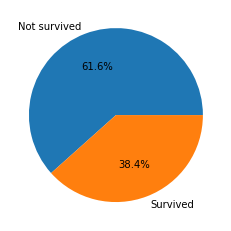

In [53]:
plt.pie(survive,labels=['Not survived','Survived'],autopct='%.1f%%')
plt.show()

* 利用柱状图显示乘客的年龄分布：

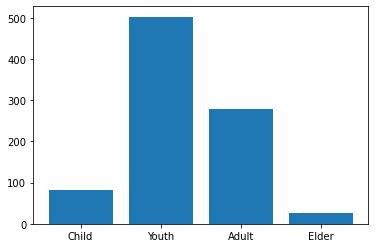

In [54]:
plt.bar(age_distributions.keys(),height=age_distributions.values())
plt.show()

* 利用叠加条形图显示乘客舱位与存活率的关系：

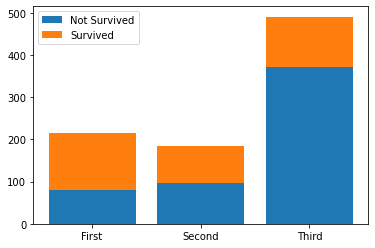

In [55]:
plt.bar(cabin_not_survive.index,cabin_not_survive.values,tick_label=['First','Second','Third'],label='Not Survived')
plt.bar(cabin_survive.index,cabin_survive.values,tick_label=['First','Second','Third'],bottom=cabin_not_survive.values,label='Survived')
plt.legend()
plt.show()

## 实验练习10

数据库`dase_intro_2020`中有一张名为`SH_Grade`的数据表，该表为上海市某所初级中学7个班级学生就读4年的考试成绩，数据已做脱敏处理。

数据表结构如下：

* id：记录编号，无实际意义；
* StuId：学生代号，例如"G03"表示7班3号学生；
* Sex：性别，M代表男性，F代表女性；
* 后续各列为科目，字段名称编码规则为【科目代号+年级+学期+期中/期末】：
> 科目代号包括【CHI】语文、【MATH】数学、【ENG】英语、【PHY】物理、【CHE】化学；
>
> 年级由6年级至9年级；
>
> 学期包括第1学期和第2学期；
>
> 期中考试为1，期末考试为2（其中9年级第2学期没有期末考试）
> 
> 请注意：物理课从8年级开始学习、化学课从9年级开始学习
>
> 例如：【MATH921】代表9年级第2学期数学科期中考试成绩
>
> 各列排序顺序为【年级，学期，期中/期末考试，科目（语文、数学、英语、物理、化学）】
* 所以一条数据由【id,StuId,Sex,CHI611,MATH611,ENG611,CHI612,MATH612,...,CHI811,MATH811,ENG811,PHY811,CHI812,...,CHI921,MATH921,ENG921,PHY921,CHE921】构成。

请依次完成以下任务：

1. 数据获取：利用`pymysql`库从数据库中爬取所有数据行，并利用`csv`库将数据保存成`SH_Grade.csv`文件（不要忘记写入列标题作为第1行内容），由于`StuId`字段包含班级信息，请在`id`字段和`Sex`字段添加一个`Class`字段用以保存学生所在班级，取值范围为A-G。
> 数据库地址：`cdb-r2g8flnu.bj.tencentcdb.com`
>
> 数据库端口：`10209`
>
> 数据库登录用户名：`dase2020`
>
> 数据库登录密码：`dase2020`
>
> 数据库名：`dase_intro_2020`
>
> 数据表名：`SH_Grade`

2. 数据预处理 I：由于人工录入疏忽，数据表中有部分行重复，特征是除`id`字段之外其他字段值均相同。由于`StuId`可唯一确定某个学生，所以如果数据表中含有多条`StuId`相同的数据行，表示这几行内容相同。请先用`pandas`库读取任务1中导出的CSV文件，然后去除重复的数据行，仅保留第一次出现的数据行，并报告经处理前后的数据条目数量。
> 参考答案：处理前252条，处理后243条

3. 数据预处理 II：由于部分同学中途转入或转出该校，或由于疾病缺席某次考试，部分考次的数据会产生空缺，也有部分学生的性别为空。现在请在任务2的基础上剔除大于等于12个字段为空的数据行，并报告经处理前后的数据条目数量。
> 参考答案：处理前243条，处理后189条

4. 数据预处理 III：对于仍空缺的数据项，请在任务3的基础上做如下处理：性别用上一条数据行的性别填充，成绩用该次该门考试的中位数填充。

5. 数据预处理 IV：为了配合旧制中考（语数英满分150分，物理满分90分，化学60分）部分考次不是以百分制计分，为与之前的百分制计分保持一致，请将部分非百分制计分的列转换为百分制计分。
> 提示1：可以通过查看每列的最大值查找非百分制计分的数据列。
>
> 提示2：8年级第2学期的期末考试中，语数英为120分制。

6. 数据分析与可视化 I：请绘制各班男女人数的叠加条形图。

7. 数据分析与可视化 II：请在一张图表中分别绘制学生代码为`A13`和`A15`的学生每次语文考试成绩走势折线图。

8. 数据分析 III：请输出7年级第2学期期中考试中英语成绩小于60分或语文成绩小于60分的学生编号、班级、英语成绩、语文成绩。

9. 数据分析 IV：请输出A班和C班6年级第2学期期末考试中各个科目的均值和方差，然后用文字（程序注释）简要比较两个班级各科目的表现情况。

10. 数据存储：将任务8产生的DataFrame对象生成CSV文件，文件名为`task8.csv`。

**本次作业可提交py源代码或直接提交ipynb文件。**